# Natural Language Processing and Text Mining

# Importing Tensorflow Packages(Libraries)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# NLP Libraries

In [3]:
import nltk
import re
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZuBaiR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Importing Dataset and dataset attribute information and data types

In [6]:
dataset=pd.read_csv('dataset.sample.csv',encoding='utf-8' )

In [11]:
dataset.sample(15)


,DISCLAIMER:,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
35,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN
77,NaN,??? ?????,NaN,NaN,NaN
155,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN
16,NaN,????? ???????,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN
10,Rowdah 96,7/16/2019,7/16/2019,?????? ????? .,NaN


In [14]:
dataset.dropna(thresh=2)

,DISCLAIMER:,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
4,This email and any files transmitted with it m...,?????,NaN,NaN,NaN
5,sugar plum,7/16/2019,7/16/2019,"To whom it may concern,",NaN
9,I was applied for a clearance last month and ...,???????.?????,NaN,NaN,NaN
10,Rowdah 96,7/16/2019,7/16/2019,?????? ????? .,NaN
17,.DCD Operation,7/15/2019,7/15/2019,,NaN
30,This email and any files transmitted with it m...,?????,NaN,NaN,NaN
31,Zayed Fares,7/15/2019,7/15/2019,NaN,NaN
33,.DCD Operation,7/15/2019,7/15/2019,,NaN
46,This email and any files transmitted with it m...,???,NaN,NaN,NaN
47,usman khan,7/15/2019,7/15/2019,Hello,NaN


# Dataset Splitation into X and y (y=Target Variable/dependent variable  & X=predictor/observed variable/ Independent Variable)

In [6]:
X=dataset.drop(['Class'], axis=1)
y=dataset['Class']

In [7]:
X

,Text
0,Supply Quality China's EXCLUSIVE dimensions at...
1,over. SidLet me know. Thx.
2,"Dear Friend,Greetings to you.I wish to accost ..."
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....
4,Not a surprising assessment from Embassy.
...,...
11924,Travel well. I'll look forward to hearing your...
11925,"Dear friend, I wish to begin by way of introdu..."
11926,Follow Up Flag: Follow upFlag Status: FlaggedM...
11927,sbwhoeop B6Saturday January 23 2010 4:09 PMRe:...


In [8]:

lists = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X['Text'])):
    # Remove all the special characters
    list = re.sub(r'\W', ' ', str(X['Text'][sen]))
    
    # remove all single characters
    list = re.sub(r'\s+[a-zA-Z]\s+', ' ', list)
    
    # Remove single characters from the start
    list = re.sub(r'\^[a-zA-Z]\s+', ' ', list) 
    
    # Substituting multiple spaces with single space
    list = re.sub(r'\s+', ' ', list, flags=re.I)
    
    # Removing prefixed 'b'
    list = re.sub(r'^b\s+', '', list)
    
    # Converting to Lowercase
    list = list.lower()
    
    # Lemmatization
    list = list.split()

    list = [stemmer.lemmatize(word) for word in list]
    list = ' '.join(list)
    
    lists.append(list)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(lists).toarray()


In [10]:
X

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(lists).toarray()


In [13]:
X


array([[0.        , 0.06575546, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest (ML Algorithm)

In [16]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

model.fit(X_train,y_train)

predictions=model.predict(X_test)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9849119865884325


In [18]:
confus_matrix=confusion_matrix(y_test,predictions)
print(confus_matrix)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1334    9]
 [  27 1016]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.99      0.97      0.98      1043

    accuracy                           0.98      2386
   macro avg       0.99      0.98      0.98      2386
weighted avg       0.98      0.98      0.98      2386

0.9849119865884325


Test Data Accuracy: 0.9849


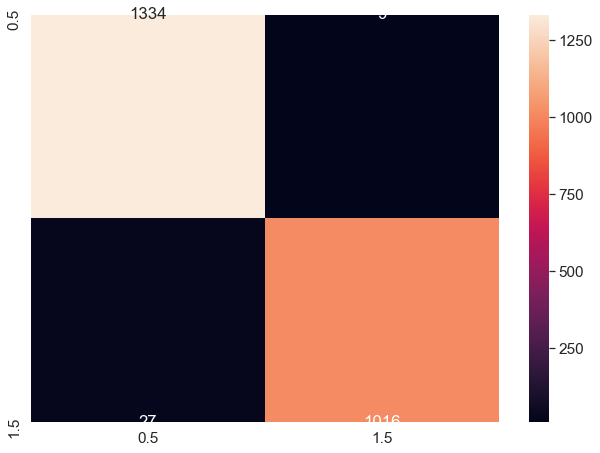

In [19]:
confus_matrix = confusion_matrix(y_test, predictions)
datafram_confus_matrix = pd.DataFrame(confus_matrix, index = (0.5, 1.5), columns = (0.5, 1.5))
plt.figure(figsize = (10.5,7.5))
sns.set(font_scale=1.4)
sns.heatmap(datafram_confus_matrix, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, predictions))

# Support Vector Machine 

In [20]:
from sklearn import svm

In [21]:
model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [22]:
print('Accuracy:',metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9844928751047779


In [23]:
print ('Precision:', metrics.precision_score(y_test, predictions))

Precision: 0.9912109375


In [24]:
print('Recall Score:', metrics.recall_score(y_test, predictions))

Recall Score: 0.9731543624161074


Test Data Accuracy: 0.9845


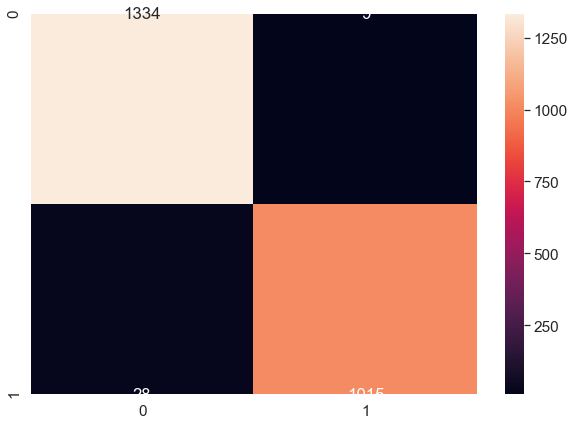

In [25]:
Confusion_matrix = confusion_matrix(y_test, predictions) 
dataframe_Confusion_matrix = pd.DataFrame(Confusion_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(dataframe_Confusion_matrix, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, predictions))

# Deep Learning Algorithm (Convolutional Neural Network)

Before we build the Convolution neural network we check the shape of X_train and X_test. As the shape is in 2D,while the CNN deels with 3D. So we reshape them

In [26]:
X_train.shape, X_test.shape

((9543, 1500), (2386, 1500))

In [27]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [28]:
X_train.shape, X_test.shape

((9543, 1500, 1), (2386, 1500, 1))

In [29]:
epochs=20
model=Sequential()
model.add(Conv1D(32,2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

W0908 03:44:24.416459  7016 deprecation.py:506] From C:\Users\ZuBaiR\.conda\envs\PythonCPU\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1499, 32)          96        
_________________________________________________________________
batch_normalization (BatchNo (None, 1499, 32)          128       
_________________________________________________________________
dropout (Dropout)            (None, 1499, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1498, 64)          4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 1498, 64)          256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1498, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 95872)             0

In [31]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

W0908 03:44:26.323458  7016 deprecation.py:323] From C:\Users\ZuBaiR\.conda\envs\PythonCPU\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [32]:
history_model=model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Train on 9543 samples, validate on 2386 samples
Epoch 1/20
9543/9543 [==============================] - 158s 17ms/sample - loss: 0.1558 - acc: 0.9450 - val_loss: 0.2359 - val_acc: 0.9845
Epoch 2/20
9543/9543 [==============================] - 146s 15ms/sample - loss: 0.0718 - acc: 0.9768 - val_loss: 0.1028 - val_acc: 0.9832
Epoch 3/20
9543/9543 [==============================] - 148s 16ms/sample - loss: 0.0566 - acc: 0.9820 - val_loss: 0.0412 - val_acc: 0.9858
Epoch 4/20
9543/9543 [==============================] - 159s 17ms/sample - loss: 0.0523 - acc: 0.9827 - val_loss: 0.0388 - val_acc: 0.9862
Epoch 5/20
9543/9543 [==============================] - 151s 16ms/sample - loss: 0.0430 - acc: 0.9845 - val_loss: 0.0446 - val_acc: 0.9866
Epoch 6/20
9543/9543 [==============================] - 149s 16ms/sample - loss: 0.0467 - acc: 0.9838 - val_loss: 0.0355 - val_acc: 0.9874
Epoch 7/20
9543/9543 [==============================] - 156s 16ms/sample - loss: 0.0379 - acc: 0.9860 - val_loss: 0.03

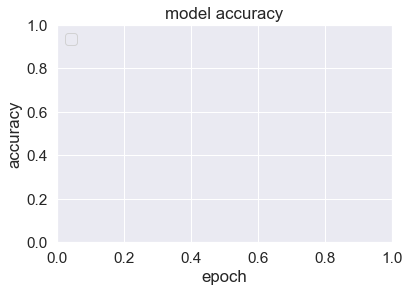

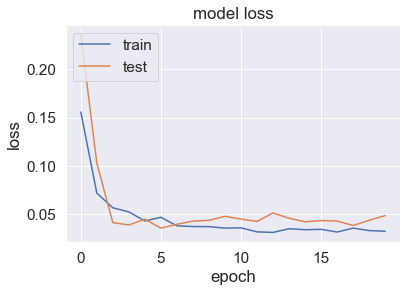

In [33]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [34]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

In [35]:
score = model.evaluate(X_test, y_test)
score


2386/2386 [==============================] - 12s 5ms/sample - loss: 0.0485 - acc: 0.98370s - loss: 0.0483 - acc: 0


[0.048488057074851335, 0.9836547]

In [36]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test, predictions)
Confusion_matrix

array([[1328,   15],
       [  24, 1019]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.99      0.98      0.98      1043

    accuracy                           0.98      2386
   macro avg       0.98      0.98      0.98      2386
weighted avg       0.98      0.98      0.98      2386



Test Data Accuracy: 0.9837


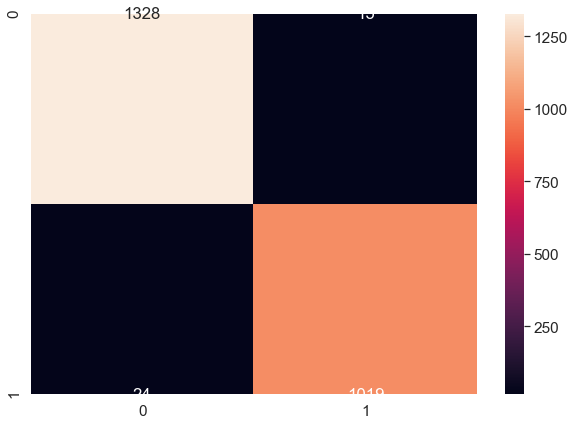

In [38]:
Confusion_matrix = confusion_matrix(y_test, predictions) 
dataframe_Confusion_matrix = pd.DataFrame(Confusion_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(dataframe_Confusion_matrix, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, predictions))